In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
# Use this to upload a data file from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


     |████████████████████████████████| 993kB 3.5MB/s 

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
link = 'https://drive.google.com/open?id=1b3_y0e3v-2xyuPq0LcCDD-LyGLJdSq3E' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('SuperMarket2004.csv') 
df = pd.read_csv('SuperMarket2004.csv')

1b3_y0e3v-2xyuPq0LcCDD-LyGLJdSq3E


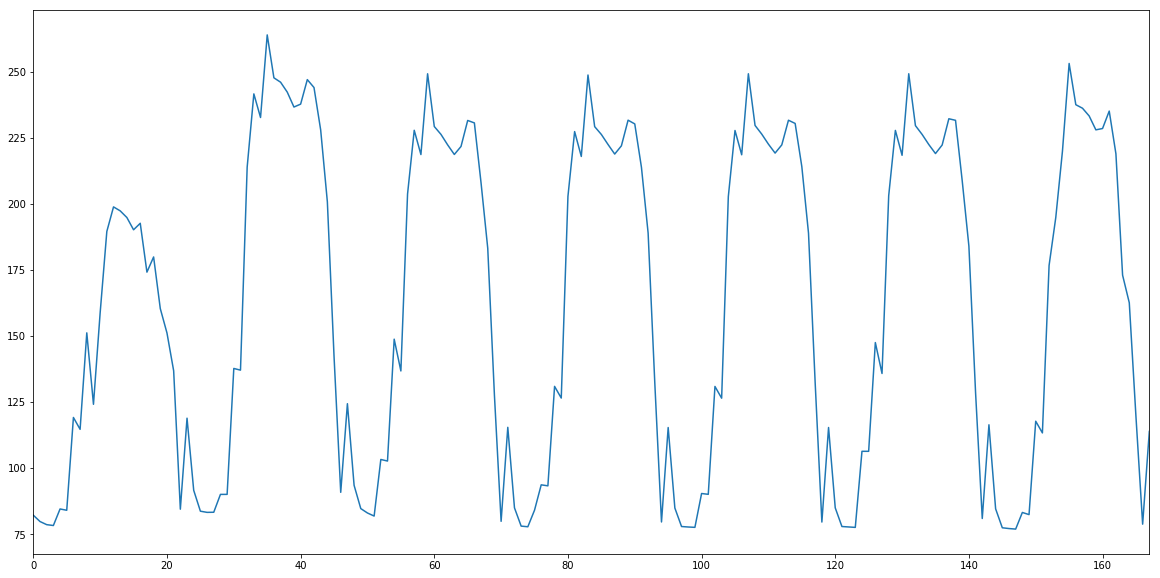

In [4]:
plt.figure(figsize=(20, 10))
df['Electricity:Facility [kW](Hourly)'].head(24*7).plot();

In [5]:
df.columns

Index(['Date/Time', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)'],
      dtype='object')

In [0]:
#split_date = 6000
df =  df['Electricity:Facility [kW](Hourly)']
#train = df.loc[:split_date]
#test = df.loc[split_date:]


In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_sc = scaler.fit_transform(df.values.reshape(-1,1))

In [8]:
df.values

array([ 82.11355364,  79.725834  ,  78.5405732 , ..., 132.99541157,
        78.6819153 , 113.91603562])

In [0]:
X = pd.DataFrame(df_sc, columns=['X_0'], index=df.index)
Y = pd.DataFrame(df_sc, columns=['Y_0'], index=df.index)
Y=Y[7*24:]
#for s in range(-1,-4,-1):
for s in range(-1,-7*24,-1):
    X['X_{}'.format(-s)] = X['X_0'].shift(s)
for s in range(-1,-24,-1):
    Y['Y_{}'.format(-s)] = Y['Y_0'].shift(s)

In [0]:
X = X.dropna(axis = 0, how ='any')
Y = Y[:len(X)]

In [11]:
X_train = X[1:6000]
X_test=X[6000:]
Y_train = Y[1:6000]
Y_test=Y[6000:]
X_train = X_train.as_matrix()
Y_train = Y_train.as_matrix()

X_test = X_test.as_matrix()
Y_test = Y_test.as_matrix()

X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (5999, 168, 1)
Test shape:  (2593, 168, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [12]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(X_train_lmse.shape[1],1), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(24))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, Y_train, epochs=100, batch_size=100, verbose=1, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5999/5999 [==============================] - 6s 1ms/step - loss: 0.3304
Epoch 2/100
5999/5999 [==============================] - 5s 865us/step - loss: 0.2871
Epoch 3/100
5999/5999 [==============================] - 5s 859us/step - loss: 0.2524
Epoch 4/100
5999/5999 [==============================] - 5s 853us/step - loss: 0.2218
Epoch 5/100
5999/5999 [==============================] - 5s 857us/step - loss: 0.1922
Epoch 6/100
5999/5999 [==============================] - 5s 856us/step - loss: 0.1502
Epoch 7/100
5999/5999 [==============================] - 5s 849us/step - loss: 0.1013
Epoch 8/100
5999/5999 [==============================] - 5s 843us/step - loss: 0.0972
Epoch 9/100
5999/5999 [==============================] - 5s 841us/step - loss: 0.0759
Epoch 10/100
5999/5999 [==============================] - 5s 841us/step - loss: 0.0675
Epoch 11/100
5999/599

In [0]:
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

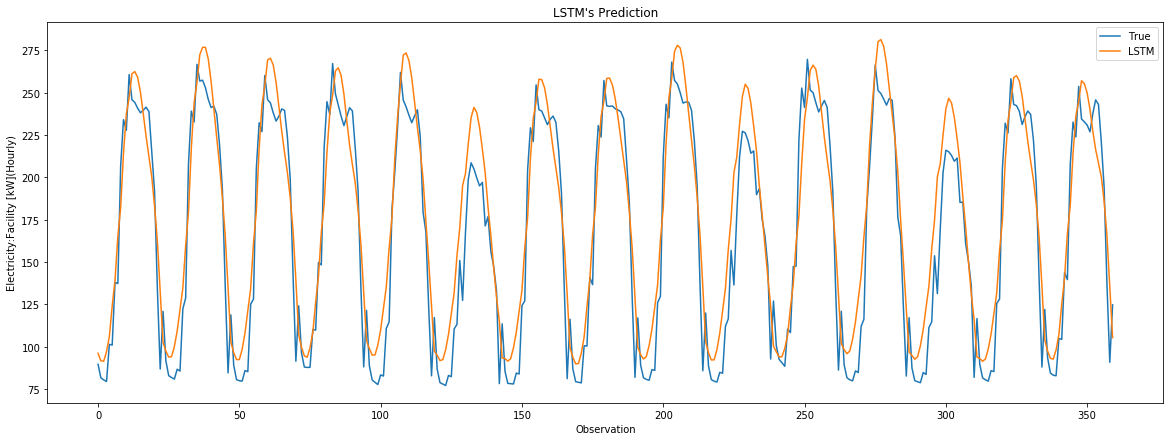

In [17]:
plt.figure(figsize=(20, 7))
plt.plot(scaler.inverse_transform(Y_test[24*60:24*75,0].reshape(-1,1)), label='True')
plt.plot(scaler.inverse_transform(lstm_y_pred_test[24*60:24*75,0].reshape(-1,1)), label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()
plt.show();